In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [136]:
df = pd.read_csv('players_20.csv')
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [137]:
players = df[df['short_name'].isin(['L. Messi', 'Cristiano Ronaldo'])]
players = players.drop(columns= ['player_url'])
players

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [138]:
cols = ['short_name', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
players_skill = players[cols]
players_skill

,short_name,shooting,passing,dribbling,defending,physic
0,L. Messi,92.0,92.0,96.0,39.0,66.0
1,Cristiano Ronaldo,93.0,82.0,89.0,35.0,78.0


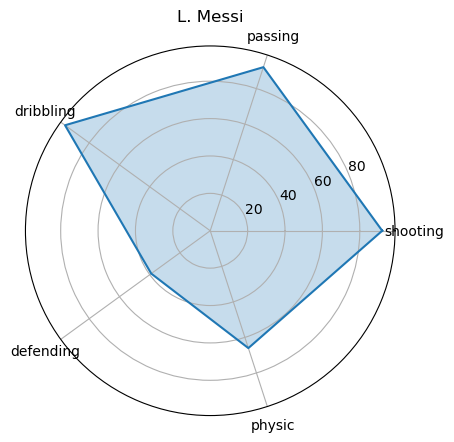

In [139]:
fig = plt.figure()

# Tạo một subplot cực trục cho hình
ax = fig.add_subplot(111, polar=True)

ability = ['shooting', 'passing', 'dribbling', 'defending', 'physic']

# Tạo một chuỗi góc trong radian được sử dụng làm đánh dấu trên trục x cho biểu đồ radar
angles = np.linspace(0, 2*np.pi, len(ability), endpoint=False)
# Thêm góc đầu tiên vào cuối chuỗi để đóng đa giác của biểu đồ radar
angles = np.concatenate((angles, [angles[0]]))

# Trích xuất các chỉ số của L. Messi từ khung dữ liệu có tên là players_skill dựa trên các tên thuộc tính được đưa ra trong ability
messi = players_skill.loc[players_skill.short_name == 'L. Messi', ability].values.reshape(-1)
# Thêm giá trị đầu tiên vào cuối chuỗi để đóng đa giác của biểu đồ radar
messi = np.append(messi, messi[:1])

# Vẽ đường nối các điểm được xác định bởi angles và messi_values
ax.plot(angles, messi)
# Tô màu khu vực được bao quanh bởi đường bằng một màu trong suốt
ax.fill(angles, messi, alpha=0.25)
# Đặt các đánh dấu trên trục x thành các góc, trừ góc cuối cùng (là một bản sao của góc đầu tiên)
ax.set_xticks(angles[:-1])
# Đặt nhãn cho các đánh dấu trên trục x thành các tên thuộc tính trong ability
ax.set_xticklabels(ability)
plt.title('L. Messi')

plt.show()

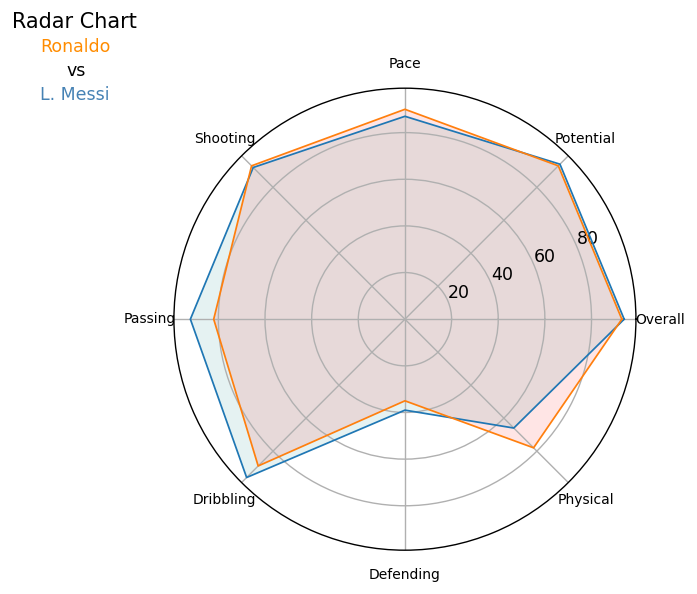

In [140]:
def RadarChart(player1, data1, player2, data2):
    attribute = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]
    data1 += data1[:1]
    data2 += data2[:1]
    
    angles1 = [n / float(len(attribute)) * 2 * np.pi for n in range(len(attribute))]
    angles1 += angles1[:1]
    
    angles2 = [n / float(len(attribute)) * 2 * np.pi for n in range(len(attribute))]
    angles2 += angles2[:1]
    
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles1[:-1], attribute, size=8)
    
    ax.plot(angles1, data1, linewidth=1, linestyle='solid', label=player1)
    ax.fill(angles1, data1, 'teal', alpha=0.1)
    
    ax.plot(angles2, data2, linewidth=1, linestyle='solid', label=player2)
    ax.fill(angles2, data2, 'red', alpha=0.1)
    
    plt.figtext(0.1, 0.98, "Radar Chart", ha='center', color='black', size='large')
    plt.figtext(0.1, 0.94, "Ronaldo", ha='center', color='darkorange', size='medium')
    plt.figtext(0.09, 0.90, "vs")
    plt.figtext(0.1, 0.86, player1, ha='center', color='steelblue', size='medium')
    
    plt.show()
    
RadarChart('L. Messi', [94.0, 94.0, 87.0, 92.0, 92.0, 96.0, 39.0, 66.0], 'Cristiano Ronaldo', [93.0, 93.0, 90.0, 93.0, 82.0, 89.0, 35.0, 78.0])